In [ ]:
link="https://raw.githubusercontent.com/rixj/Biostatistical-Analysis/master/graduation.csv"
dat = read_csv(file = url(link))
attach(dat)

This exam uses graduation.csv data for examining differences in time to graduation among undergraduate students. Because of the way this data was created, the time outcome is somewhat strange, just interpret estimates as increase/decrease and multiplicatively as appropriate for the model (don’t attempt to state units).

| name     | variable                                                             |
|----------|----------------------------------------------------------------------|
| id       | row number                                                           |
| time     | time to undergraduate graduation                                     |
| event    | a binary indicator of graduation (1 yes 0 no)                        |
| prttime  | a binary indicator of if the student is parttime or not (1 yes 0 no) |
| age      | age at college enrollment                                            |
| gpa      | student's GPA at the start of their 2nd year                         |
| dblmaj   | a binary indicator of if the student is a double major or not        |

**Problem 1:** In survival analysis, the summary table 1 typically examines how the covariates (parttime, age, gpa, dblmaj) differ by event status. Be sure to include counts/measures of center and measure of significance. Create a single summary table 1, include appropriate figures, and write an interpretive paragraph.

In [ ]:
library(survival)
sfit0 = survfit(Surv(time, event)~1)
table(event,prttime)

sfit1 = survfit(Surv(time, event)~prttime)

table(event,age)
sfit2 = survfit(Surv(time, event)~age)
age2=ifelse(age>25,2,age)
age1=ifelse(age2>20,1,age2)
ageA=ifelse(age1>2,0,age1)
table(event,ageA)
sfit2a = survfit(Surv(time, event)~ageA)

table(event,event)
sfit3 = survfit(Surv(time, event)~gpa)
gpaA = ifelse(gpa<2,0,1)
table(event,gpaA)
sfit3a = survfit(Surv(time, event)~gpaA)
stack = NULL                     # 3 risk levels for "gpa"
for (i in 1:length(gpa)) {
  if (gpa[i] >= 3 ) {stack = c(stack, 2)}
  else if (gpa[i] >= 2 ) {stack = c(stack, 1)}
  else {stack = c(stack, 0)}
}
gpaB = stack;
table(event,gpaB)
sfit3b = survfit(Surv(time, event)~gpaB)

table(event,dblmaj)
sfit4 = survfit(Surv(time, event)~dblmaj)

library(oddsratio)
fitglm = glm(event~prttime+age+gpa+dblmaj, family="binomial")
logit = fitglm$coefficients
exp(logit)                # odds ratio
exp(logit)/(1+exp(logit)) # probability

**Summary Table 1** where age and gpa are categorical we have:

|         | Value         | n    | Dropped | Graduated | Survivalrate | Median   | 0.95LCL  | 0.95UCL  |
|---------|---------------|------|---------|-----------|--------------|----------|----------|----------|
| event   |               | 5000 | 186     | 4814      | 0.9628       | 4.99E-05 | 4.74E-05 | 5.24E-05 |
| prttime | 0             | 3955 | 69      | 3886      | 0.982553729  | 3.54E-04 | 3.26E-04 | 3.83E-04 |
|         | 1             | 1045 | 117     | 928       | 0.888038278  | 7.09E-05 | 6.80E-05 | 7.47E-05 |
| dblmaj  | 0             | 4006 | 150     | 3856      | 0.962556166  | 4.91E-05 | 4.00E-05 | 6.09E-05 |
|         | 1             | 994  | 36      | 958       | 0.963782696  | 2.07E-05 | 1.64E-05 | 3.24E-05 |
| gpa     | GPA = 0-1.9   | 110  | 3       | 107       | 0.972727273  | 6.88E-05 | 4.75E-05 | 9.18E-05 |
|         | GPA = 2.0-4.0 | 4890 | 183     | 4707      | 0.962576687  | 6.95E-05 | 6.48E-05 | 7.70E-05 |
| age     | 26 years +    | 75   | 0       | 75        | 1            | 6.71E-05 | 6.38E-05 | 7.09E-05 |
|         | 21-25 years   | 442  | 8       | 434       | 0.981900452  | 6.53E-05 | 6.21E-05 | 6.83E-05 |
|         | 17-20 years   | 4483 | 178     | 4305      | 0.960294446  | 8.08E-05 | 7.35E-05 | 9.01E-05 |

Information on Continuous Values (age and gpa)

|     | Values       | Min, Max |
|-----|--------------|----------|
| age | 18.60 ± 1.99 | 17, 41   |
| gpa | 3.11 ± 0.45  | 0.5, 4   |

Odds-ratio Table

|         | odds ratio | probability |
|---------|------------|-------------|
| prttime | 0.1392271  | 0.1222119   |
| age     | 1.1809622  | 0.5414868   |
| gpa     | 1.2274882  | 0.5510638   |
| dblmaj  | 1.0118082  | 0.5029347   |

**Summary:**
A survival curve is based on a tabulation of the number at risk and number of events at each unique death time. Sfit0: Not considering any predictors, this survival model reports on time and the survival probability data set. Looking at Summary Table 1 we see the following:
Part-time students are less likely to graduate. Every student who was older than 25 graduated. Older students were more likely to graduate. Surprisingly, students with a GPA < 2.0 were more likely to graduate than higher-GPA students. Double-major students were at the same graduation rate as peers who did not.

**Problem 2:** Fit a survival model for the data of interest. Present your best model. Explain why you fit the model you do, what covariates you use and why, examine model diagnostics, and write an interpretive paragraph.

In [ ]:
survreg(Surv(time, event)~prttime ,dist = 'weibull')
# Coefficients:
# (Intercept)     prttime 
#   -9.517438    1.942824 
# Scale= 1.007439 
# Loglik(model)= 39186.3   Loglik(intercept only)= 37857.9
# 	Chisq= 2656.8 on 1 degrees of freedom, p= <2e-16 

survreg(Surv(time, event)~age ,dist = 'weibull')
# Coefficients:
# (Intercept)         age 
# -7.45726007 -0.08147991 
# Scale= 1.372977 
# Loglik(model)= 37887.7   Loglik(intercept only)= 37857.9
# 	Chisq= 59.78 on 1 degrees of freedom, p= 1.06e-14 

survreg(Surv(time, event)~gpa ,dist = 'weibull')
# Coefficients:
#  (Intercept)          gpa 
# -8.943993339 -0.007628517 
# Scale= 1.379051 
# Loglik(model)= 37857.9   Loglik(intercept only)= 37857.9
# 	Chisq= 0.03 on 1 degrees of freedom, p= 0.863 

survreg(Surv(time, event)~dblmaj ,dist = 'weibull')
# Coefficients:
# (Intercept)      dblmaj 
# -8.98532474  0.08609219 
# Scale= 1.379052 
# Loglik(model)= 37859.4   Loglik(intercept only)= 37857.9
# 	Chisq= 3.03 on 1 degrees of freedom, p= 0.0818 

The p-value for the Chi-squared test for prttime and age is < 0.05 which means that prttime and age are our only significant factors. So our final model will only include these variables.

In [ ]:
survreg(Surv(time,event)~prttime+age , dist='weibull')
# Coefficients:
# (Intercept)     prttime         age 
#  -7.6974565   1.9599230  -0.0984771 
# Scale= 0.9901143 
# Loglik(model)= 39264.4   Loglik(intercept only)= 37857.9
# 	Chisq= 2813.13 on 2 degrees of freedom, p= <2e-16 

Our final model has a p-value = 0.

**Problem 3:** Consider the GPA variable. It may be more informative to examine a binary version of this variable, e.g. if the student had a failing GPA at the start of their 2nd year. Examine model diagnostics and write an interpretive paragraph. Also, examine and explain how this consideration alters your model from your best model. Is there any concern with altering the GPA variable in this way?

In [ ]:
survreg(Surv(time, event)~gpa ,dist = 'weibull')
# Coefficients:
#  (Intercept)          gpa 
# -8.943993339 -0.007628517 
# Scale= 1.379051 
# Loglik(model)= 37857.9   Loglik(intercept only)= 37857.9
# 	Chisq= 0.03 on 1 degrees of freedom, p= 0.863 

survreg(Surv(time, event)~ifelse(gpa<2,0,1) ,dist = 'weibull')
# Call:
# Coefficients:
#           (Intercept) ifelse(gpa < 2, 0, 1) 
#           -9.03914650            0.07301119 
# Scale= 1.378955 
# Loglik(model)= 37858   Loglik(intercept only)= 37857.9
# 	Chisq= 0.29 on 1 degrees of freedom, p= 0.591 

survreg(Surv(time, event)~ifelse(gpa<1,0,1) ,dist = 'weibull')
# Coefficients:
#           (Intercept) ifelse(gpa < 1, 0, 1) 
#             -7.875628             -1.093378 
# Scale= 1.378729
# Loglik(model)= 37859.5   Loglik(intercept only)= 37857.9
# 	Chisq= 3.33 on 1 degrees of freedom, p= 0.068 

survdiff(Surv(time, event)~ifelse(gpa<1,0,1))
#                            N Observed Expected (O-E)^2/E (O-E)^2/V
# ifelse(gpa < 1, 0, 1)=0    5        4     8.48   2.36853      2.37
# ifelse(gpa < 1, 0, 1)=1 4995     4810  4805.52   0.00418      2.37

#  Chisq= 2.4  on 1 degrees of freedom, p= 0.1 

When gpa is a binary value and determined by sophomores who have a GPA < 2, the p-value decreases from 0.86 to 0.59 but it is still not a significant value to be incorporated into our model. When gpa is a binary value and determined by failing sophomores defined by students who have a GPA < 1, the p-value decreases from 0.86 to 0.07 which may be signficant factor if our $\alpha$ = 0.10. Our model is unchanged because it does not include gpa anyways.

**Problem 4:** Fit a logistic model for the event indicator rather than a survival model (pick your covariate set from either 2 or 3). Make interpretations and comparisons. Is this a better way to examine this data? Why or why not?

In [ ]:
glmfit = glm(event~prttime+age,family=binomial(link=logit))
summary(glmfit)

# Call:
# glm(formula = event ~ prttime + age, family = binomial(link = logit))

# Deviance Residuals: 
#     Min       1Q   Median       3Q      Max  
# -3.2055   0.1779   0.1932   0.2097   0.5438  

# Coefficients:
#             Estimate Std. Error z value Pr(>|z|)    
# (Intercept)  0.99078    1.04225   0.951  0.34180    
# prttime     -1.96975    0.15640 -12.594  < 2e-16 ***
# age          0.16564    0.05695   2.908  0.00363 ** 
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# (Dispersion parameter for binomial family taken to be 1)

#     Null deviance: 1589.4  on 4999  degrees of freedom
# Residual deviance: 1417.5  on 4997  degrees of freedom
# AIC: 1423.5

# Number of Fisher Scoring iterations: 7

1-pchisq(1589.4-1417.5, 4999-4996)
# [1] 0
exp(1)**(-1.98)
# [1] 0.1380692

Using the logistic model we get the null deviance and residual deviance so we can compare the null model to our model and we calculate the p-value which is 0, asserting that this is a significant model. When testing the association between (prttime and age) and graduating we reject the null hypothesis at the 0.05 alpha level. We can also check the log odds ratio.

In [ ]:
fitglm = glm(event~prttime+age, family="binomial")
logit = fitglm$coefficients
exp(logit)                # odds ratio
# (Intercept)     prttime         age 
#    2.693333    0.139492    1.180143 
exp(logit)/(1+exp(logit)) # probability
# (Intercept)     prttime         age 
#   0.7292418   0.1224160   0.5413145 

This supports our previous calculation that prttime students are 0.122 times more likely to graduate than full-time students, which in other words means full-time students are 8.2 times more likely to graduate. Also older students are 18% more likely to graduate than younger students.

In [ ]:
preds = predict(glmfit, dat[,4:5])
nroc = roc(event, preds)
auc(nroc)
# Area under the curve: 0.7477

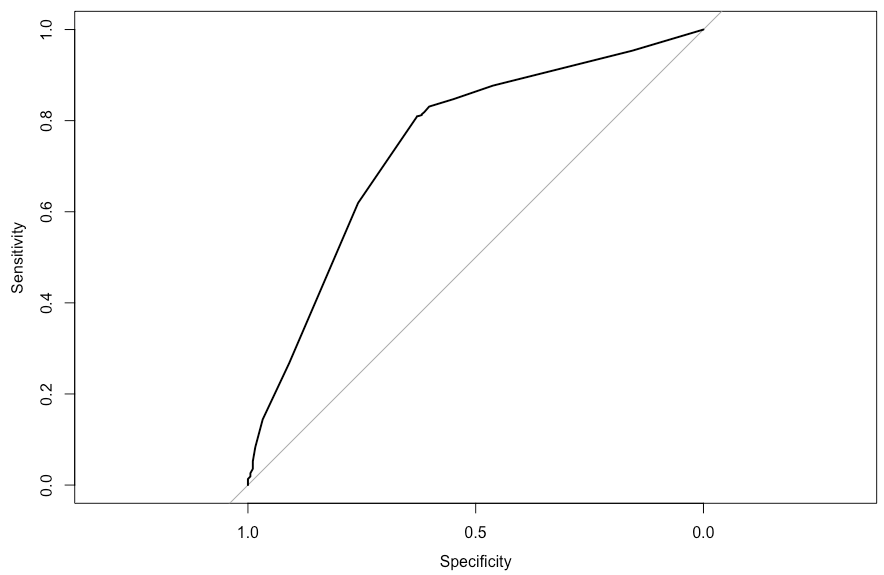

The graph is a better display of whether or not a student will graduate and the graph shape being more of a 90-degree angle than a y=x slope shows that it is a good prediction model.